In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/dima/Downloads/transactions (1).csv')

In [5]:
columns = [
    'month',
    'bus_name',
    'pay_type',
    'pay_num',
    'date',
    'deal_month',
    'deal_year',
    'pay_date',
    'sum',
    'curr',
    'num_of_payments',
    'total_num_of_payments',
    'category',
    'is_excluded',
    'cmments',
    'source',
    'original_sum',
]
df.columns = columns

In [19]:
df['category'].value_counts()

הוצאות משתנות         1588
אוכל בחוץ              769
שבוע 3                 243
ביטוח                  221
שבוע 4                 214
שבוע 2                 192
שבוע 5                 180
תשלומים                170
תחבורה ציבורית         145
דיגיטל                 134
כללי                   117
רכב                    111
הכנסות משתנות          106
שבוע 1                  88
פארמה                   84
תקשורת                  59
הכנסות קבועות           54
עמלות                   42
שיק                     42
משכנתא                  19
העברות                  15
אחר                     15
דיור                    14
חסכון קבוע              12
RiseUp                  10
ארנונה                  10
חשמל                    10
גז                      10
שבוע 6                   8
מים                      7
חינוך                    7
הוצאות לא תזרימיות       5
מזומן                    3
הכנסות לא תזרימיות       3
Name: category, dtype: int64

In [7]:
df[df['category'].apply(lambda x: 'שבוע' in x)].head()

,month,bus_name,pay_type,pay_num,date,deal_month,deal_year,pay_date,sum,curr,num_of_payments,total_num_of_payments,category,is_excluded,cmments,source,original_sum
71,2023-10,שורצקי,isracard,8859,10/10/2023,NaN,NaN,10/11/2023,-87.94,NaN,NaN,NaN,שבוע 1,False,NaN,creditCard,-87.94
72,2023-10,סופר שנקין,isracard,8976,11/10/2023,NaN,NaN,10/11/2023,-50.00,NaN,NaN,NaN,שבוע 1,False,NaN,creditCard,-50.00
73,2023-10,שורצקי,isracard,8859,12/10/2023,NaN,NaN,10/11/2023,-99.57,NaN,NaN,NaN,שבוע 1,False,NaN,creditCard,-99.57
74,2023-10,ROMANTIC SUPERMARKET,isracard,8859,14/10/2023,NaN,NaN,02/12/2023,-89.18,NaN,NaN,NaN,שבוע 1,False,NaN,creditCard,-89.18
75,2023-10,ביאטריס ר.י סחר בע'',isracard,8976,24/10/2023,NaN,NaN,10/11/2023,-99.63,NaN,NaN,NaN,שבוע 3,False,NaN,creditCard,-99.63


In [8]:
df['month'].value_counts()

2023-08    281
2022-10    277
2022-08    270
2023-02    261
2022-12    249
2023-05    247
2022-06    244
2023-04    242
2023-03    242
2023-06    238
2022-05    235
2022-04    234
2023-01    234
2023-07    228
2022-11    224
2022-07    223
2023-10    213
2022-09    200
2022-03    183
2023-09    166
2023-11     16
Name: month, dtype: int64

In [9]:
#nov = df[(df['month'] == '2023-10') & (df['sum'] < 0) & (df['source'] == 'creditCard') & (nov['pay_date'] == '10/11/2023')]
nov = df[(df['sum'] < 0) & (df['source'] == 'creditCard')]

<Axes: >

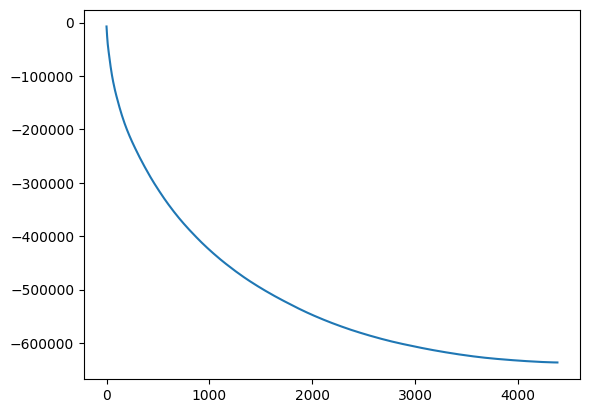

In [10]:
nov.sort_values('sum', ascending=True).reset_index()['sum'].cumsum().plot()

In [11]:
nov.groupby('bus_name')['sum'].sum().reset_index().sort_values('sum', ascending=True).head(30)#[['bus_name',  'sum', 'num_of_payments', 'total_num_of_payments', 'category']]

,bus_name,sum
334,WOLT,-32038.89
551,העברה ב BIT בנהפ,-22706.00
954,שופרסל און ליין,-19034.07
958,שורצקי,-17040.52
242,PAYBOX,-13805.00
352,אופרן שרותים בעמ,-11828.08
363,אטליז בשנקין בעמ,-11034.55
572,חברת חשמל לישראל,-10154.11
165,KSP אקספרס-גמא,-8942.80
817,עמותת מקהלת הוק,-8820.00


In [12]:
shor = nov.groupby(['bus_name', 'month'])['sum'].sum().reset_index()

In [13]:
shor

,bus_name,month,sum
0,'מנויRISEUP ',2023-05,-45.00
1,'מנויRISEUP ',2023-06,-45.00
2,'מנויRISEUP ',2023-07,-45.00
3,(888)850-3958~BKG*HO,2023-07,-6352.67
4,)המעבדה של דניאל )דנ,2022-11,-70.00
...,...,...,...
2506,תשלום לועד הבית,2023-06,-203.20
2507,תשלום לועד הבית,2023-07,-203.20
2508,תשלום לועד הבית,2023-08,-203.20
2509,תשלום לועד הבית,2023-09,-203.20


In [24]:
shor = df.groupby(['category', 'month'])['sum'].sum().reset_index()[lambda x: x['category'] == 'תשלומים']

<Axes: xlabel='month'>

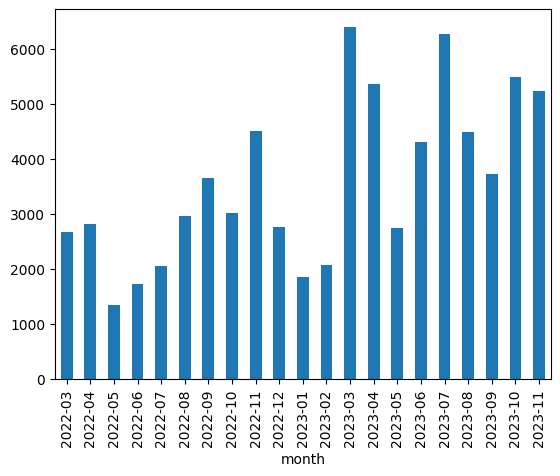

In [25]:
shor.set_index('month')['sum'].abs().plot(kind='bar')

In [26]:
shor

,category,month,sum
482,תשלומים,2022-03,-2671.40
483,תשלומים,2022-04,-2826.66
484,תשלומים,2022-05,-1342.66
485,תשלומים,2022-06,-1727.51
486,תשלומים,2022-07,-2051.91
487,תשלומים,2022-08,-2969.39
488,תשלומים,2022-09,-3651.87
489,תשלומים,2022-10,-3013.53
490,תשלומים,2022-11,-4520.41
491,תשלומים,2022-12,-2763.00


In [27]:
df[~df['num_of_payments'].isna()]['category'].value_counts()

תשלומים    170
ביטוח       37
חינוך        7
שיק          5
כללי         4
Name: category, dtype: int64

In [29]:
df[~df['num_of_payments'].isna() & (df['category'] != 'תשלומים')].sort_values('sum', ascending=False)[['bus_name', 'num_of_payments', 'total_num_of_payments', 'sum']]

,bus_name,num_of_payments,total_num_of_payments,sum
4525,איילון רכב חובה,4.0,NaN,-97.00
2842,איילון רכב חובה,11.0,12.0,-97.00
4290,איילון רכב חובה,5.0,NaN,-97.00
4056,איילון רכב חובה,6.0,NaN,-97.00
3818,איילון רכב חובה,7.0,12.0,-97.00
3589,איילון רכב חובה,8.0,12.0,-97.00
3321,איילון רכב חובה,9.0,12.0,-97.00
3119,איילון רכב חובה,10.0,12.0,-97.00
718,וויצ'ק בעמ-צמרת,1.0,12.0,-168.35
270,וויצ'ק בעמ-צמרת,3.0,12.0,-168.35


In [30]:
df['is_tashlumim'] = ~df['num_of_payments'].isna()

In [32]:
df[~df['num_of_payments'].isna()].groupby('month')['sum'].sum()

month
2022-03   -2768.40
2022-04   -3641.86
2022-05   -1783.66
2022-06   -2532.19
2022-07   -2148.91
2022-08   -3066.39
2022-09   -4066.12
2022-10   -3743.53
2022-11   -5305.41
2022-12   -3712.41
2023-01   -2492.97
2023-02   -2718.37
2023-03   -7038.95
2023-04   -5997.45
2023-05   -2911.20
2023-06   -4484.95
2023-07   -6946.91
2023-08   -5427.93
2023-09   -5025.21
2023-10   -6752.19
2023-11   -6491.69
Name: sum, dtype: float64

In [35]:
df[df['is_tashlumim'] & (df['month'] == '2023-11')][['bus_name', 'num_of_payments', 'total_num_of_payments', 'sum']]

,bus_name,num_of_payments,total_num_of_payments,sum
0,א.א אורטופדיה וספורט,4.0,10.0,-237.50
1,א.א אורטופדיה וספורט,4.0,10.0,-200.00
2,הראל ביטוחי חול,2.0,3.0,-285.00
3,ביס בלפור הורים,3.0,3.0,-354.33
5,וויצ'ק בעמ-צמרת,5.0,12.0,-168.35
7,אמצ שיווק חשמל-מיזוג,5.0,5.0,-1399.00
8,על שפת הנחל,3.0,3.0,-960.00
9,אל על אינטרנט בתשלומ,2.0,5.0,-1152.51
10,איקאה ראשלצ-גמא,3.0,3.0,-624.00
11,KSP רשלצ-גמא,7.0,8.0,-171.00


In [114]:
df['date'] = pd.to_datetime(df['date'])

/Users/dima/.virtualenvs/hs/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/11/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/dima/.virtualenvs/hs/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/11/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/dima/.virtualenvs/hs/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/10/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/dima/.virtualenvs/hs/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/11/

In [48]:
df[['month', 'bus_name']].value_counts().sort_values().reset_index().groupby('bus_name').count().sort_values(0, ascending=False).head(20)

,month,0
bus_name,,
‏משכורת (י),21,21
KSP אקספרס-גמא,21,21
העברה ב BIT בנהפ,20,20
WOLT,20,20
מפעל הפיס מנויים,20,20
אטליז בשנקין בעמ,20,20
PAYBOX,20,20
שורצקי,20,20
הראל-ביטוח בריאות,20,20


In [150]:
common = set( df[(df['sum'] < 0) & (df['source'] == 'creditCard')][['month', 'bus_name']].value_counts().sort_values().reset_index().groupby('bus_name').count()[lambda x: x[0] > 10].index)

In [151]:
len(common)

54

In [152]:
common

{'35314369001  ~PAYPAL',
 '4029357733   ~PAYPAL',
 'EATS',
 'FRENCHY',
 'GETT',
 'ITUNES.COM   ~APPLE.',
 'KSP אקספרס-גמא',
 'LUXEMBOURG   ~ALIEXP',
 'MOUNTAIN VIEW~GOOGLE',
 'PAYBOX',
 'WAYCUP COFFE',
 'WOLT',
 'YES די.בי.אס.ש.לווין',
 'אוזן',
 'אטליז בשנקין בעמ',
 'אי.אם.פי.אם-שנקין',
 'איילון ביטוח רכב רכו',
 'איילון רכב חובה',
 'אלברט 1943',
 'בזק בינלאומי בעמ',
 "ביאטריס ר.י סחר בע''",
 'גרינלנד מזון וציוד',
 'דגים בשינקין',
 'דווקה גורמה בעמ',
 'העברה ב BIT בנהפ',
 'הראל ביטוח חיים',
 'הראל-ביטוח בריאות',
 'חשבון לשרותי סלקום',
 'טיב טעם רשתות בעמ-',
 'כרמים גריל בר',
 'לו פיי קפה בעמ',
 'לחם תושיה',
 'מ.התחבורה-פנגו מוביט',
 'מ.ע.ע. שוקיס בעמ',
 "מנו וינו בע''מ",
 'מנורה מבטחים - חיים',
 'מפעל הפיס מנויים',
 'נדיה נייל',
 'סופר כרמים',
 'סופר פארם שינקין 83',
 'סופר שנקין',
 'סטודיו טשרנחובסקי',
 'סיבוס סודקסו',
 'עדינה - המעדניה בשנק',
 'עמותת מקהלת הוק',
 'ענת היימן',
 'פז YELLOW הסי -',
 'פיצה יואב',
 'קרן מכבי- חיוב',
 'שומרה ביטוח אלמנטרי',
 'שופרסל און ליין',
 'שוקידו',
 '

In [156]:
df['day'] = df['date'].dt.day

In [157]:
df['week'] = round(df['date'].dt.day / 7)

In [208]:
df[df['bus_name'].isin(common) & df['total_num_of_payments'].isna()].groupby(['bus_name', 'week'])['sum'].agg(['mean', 'count'])[lambda x: x['count'] > 6].reset_index().sort_values('mean').head(40)

,bus_name,week,mean,count
101,שופרסל און ליין,1.0,-931.910000,10
94,עמותת מקהלת הוק,1.0,-735.000000,7
17,PAYBOX,2.0,-432.800000,15
91,סטודיו טשרנחובסקי,1.0,-400.000000,10
37,איילון ביטוח רכב רכו,4.0,-356.000000,11
53,העברה ב BIT בנהפ,1.0,-276.500000,30
0,35314369001 ~PAYPAL,1.0,-239.210000,7
55,העברה ב BIT בנהפ,3.0,-232.206897,29
78,נדיה נייל,4.0,-222.500000,10
19,PAYBOX,4.0,-206.363636,11


In [201]:
bus = 'תשלום ועד בית'

In [202]:
df[df['bus_name'].isin(common)].groupby(['bus_name', 'day'])['sum'].agg(['mean', 'count']).loc[bus]

,mean,count
day,,
1,-203.2,1
2,-203.2,1
3,-203.2,1
4,-203.2,2
5,-203.2,2
6,-203.2,2
7,-203.2,1
8,-203.2,1
10,-203.2,1


In [186]:
df.groupby(['bus_name', 'month', 'day'])['sum'].agg(['sum', 'count']).loc[bus]

sum  count
month   day               
2022-03 3   -208.94      2
        30   -12.47      1
2022-04 4   -210.37      2
        28   -12.55      1
2022-05 5   -211.58      2
        26   -12.63      1
2022-06 13  -213.22      2
        29   -12.72      1
2022-07 7   -214.43      2
        28   -12.80      1
2022-08 8   -215.25      2
        29   -12.85      1
2022-09 9   -217.68      2
        28   -12.99      1
2022-10 10  -217.06      2
        30   -12.96      1
2022-11 13  -217.48      2
        29   -12.98      1
2022-12 12  -225.12      2
        29   -13.05      1
2023-01 1   -225.32      2
        30   -20.55      1
2023-02 2   -225.95      2
        26   -20.60      1
2023-03 3   -239.06      2
        29   -20.67      1
2023-04 13  -306.05      3
        27   -20.77      1
2023-05 5   -307.25      3
        29   -20.85      1
2023-06 6   -309.62      3
        28   -21.01      1
2023-07 7   -310.23      3
        30   -21.05      1
2023-08 8   -437.24      3
        30   -21.05      1
2023-09 9   -359.25      3
        28   -21.11      1
2023-10 10  -360.94      3
        30   -21.21      1

In [197]:
df[df['bus_name'] == bus].head()

,month,bus_name,pay_type,pay_num,date,deal_month,deal_year,pay_date,sum,curr,num_of_payments,total_num_of_payments,category,is_excluded,cmments,source,original_sum,is_tashlumim,day,week
396,2023-08,איילון ביטוח רכב רכו,isracard,8859,2023-07-26,NaN,NaN,2023-07-26,-364.0,NaN,NaN,NaN,ביטוח,False,NaN,creditCard,-364.0,False,26,4.0
678,2023-07,איילון ביטוח רכב רכו,isracard,8859,2023-06-27,NaN,NaN,2023-06-27,-363.0,NaN,NaN,NaN,ביטוח,False,NaN,creditCard,-363.0,False,27,4.0
905,2023-06,איילון ביטוח רכב רכו,isracard,8859,2023-05-28,NaN,NaN,2023-05-28,-363.0,NaN,NaN,NaN,ביטוח,False,NaN,creditCard,-363.0,False,28,4.0
1144,2023-05,איילון ביטוח רכב רכו,isracard,8859,2023-04-27,NaN,NaN,2023-04-27,-363.0,NaN,NaN,NaN,ביטוח,False,NaN,creditCard,-363.0,False,27,4.0
1390,2023-04,איילון ביטוח רכב רכו,isracard,8859,2023-03-27,NaN,NaN,2023-03-27,-363.0,NaN,NaN,NaN,ביטוח,False,NaN,creditCard,-363.0,False,27,4.0


In [110]:
nov['day'].value_counts()

6     497
10    493
5     461
7     444
8     432
12    410
4     397
9     343
11    313
3     256
1     241
2     226
26      4
25      4
19      3
20      3
30      3
15      2
23      2
31      2
28      2
13      2
22      1
17      1
29      1
14      1
Name: day, dtype: int64

<Axes: xlabel='day'>

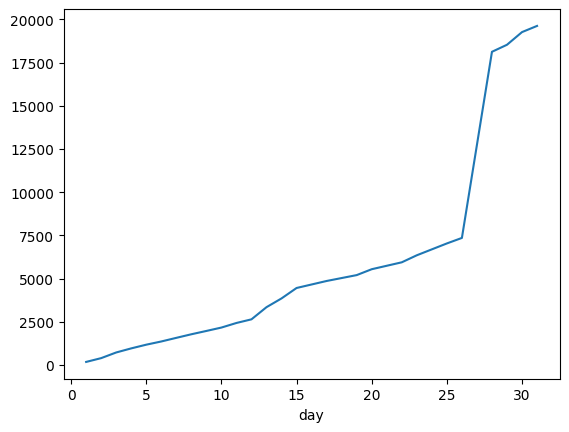

In [112]:
nov.groupby('day')['sum'].mean().abs().cumsum().plot()

In [95]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [98]:
nov.groupby('day')['sum'].min().abs().cumsum()

day
1      1086.72
2      8386.35
3     10843.35
4     13791.35
5     16966.03
6     19466.03
7     21546.03
8     23072.11
9     25837.75
10    28940.39
11    30339.39
12    34078.37
Name: sum, dtype: float64

In [93]:
nov.groupby('day')['sum'].apply(lambda x: x.describe()).reset_index()

,day,level_1,sum
0,1,count,235.000000
1,1,mean,-119.324213
2,1,std,149.557661
3,1,min,-1086.720000
4,1,25%,-140.300000
...,...,...,...
91,12,min,-3738.980000
92,12,25%,-167.717500
93,12,50%,-62.490000
94,12,75%,-26.835000


In [217]:
df[df['bus_name'].apply(lambda x: 'חשמל' in x)].groupby(['day', 'bus_name'])['sum'].agg(['count', 'sum'])

,,count,sum
day,bus_name,,
7,אמצ שיווק חשמל-מיזוג,1,-1403.00
8,אמצ שיווק חשמל-מיזוג,1,-1399.00
9,אמצ שיווק חשמל-מיזוג,1,-1399.00
10,אמצ שיווק חשמל-מיזוג,1,-1399.00
11,אמצ שיווק חשמל-מיזוג,1,-1399.00
12,אלי חשמל לרכב,1,-200.00
16,חברת חשמל לישראל,1,-960.80
19,חברת חשמל לישראל,4,-3321.65
20,חברת חשמל לישראל,1,-1358.80


In [211]:
list({'d': 1, 'z': 2}.items())

[('d', 1), ('z', 2)]

In [212]:
list1 = [('ONE', 1), ('TWO', 2)]

In [213]:
list2 = [('TWO', 22), ('THREE', 3)]

In [214]:
res = list({name.upper(): date for name, date in list1 + list2}.items())

In [215]:
res

[('ONE', 1), ('TWO', 22), ('THREE', 3)]